In [1]:
import pandas as pd
import numpy as np
from datetime import datetime as dt

In [2]:
btc = pd.read_csv('archive/coin_Bitcoin.csv')
btc.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


In [3]:
btc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2991 entries, 0 to 2990
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        2991 non-null   int64  
 1   Name       2991 non-null   object 
 2   Symbol     2991 non-null   object 
 3   Date       2991 non-null   object 
 4   High       2991 non-null   float64
 5   Low        2991 non-null   float64
 6   Open       2991 non-null   float64
 7   Close      2991 non-null   float64
 8   Volume     2991 non-null   float64
 9   Marketcap  2991 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 233.8+ KB


# Preprocessing

In [4]:
btc = btc.drop(['SNo','Name','Symbol','High','Low','Open','Marketcap'], axis=1)
btc.head()

,Date,Close,Volume
0,2013-04-29 23:59:59,144.539993,0.0
1,2013-04-30 23:59:59,139.000000,0.0
2,2013-05-01 23:59:59,116.989998,0.0
3,2013-05-02 23:59:59,105.209999,0.0
4,2013-05-03 23:59:59,97.750000,0.0


In [5]:
btc['Date'] = btc['Date'].apply(lambda date: dt.strptime(date,'%Y-%m-%d %H:%M:%S'))
btc.head()

,Date,Close,Volume
0,2013-04-29 23:59:59,144.539993,0.0
1,2013-04-30 23:59:59,139.000000,0.0
2,2013-05-01 23:59:59,116.989998,0.0
3,2013-05-02 23:59:59,105.209999,0.0
4,2013-05-03 23:59:59,97.750000,0.0


In [6]:
btc.dtypes

Date      datetime64[ns]
Close            float64
Volume           float64
dtype: object

In [7]:
btc = btc.set_index('Date')

In [8]:
btc.head()

,Close,Volume
Date,,
2013-04-29 23:59:59,144.539993,0.0
2013-04-30 23:59:59,139.000000,0.0
2013-05-01 23:59:59,116.989998,0.0
2013-05-02 23:59:59,105.209999,0.0
2013-05-03 23:59:59,97.750000,0.0


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

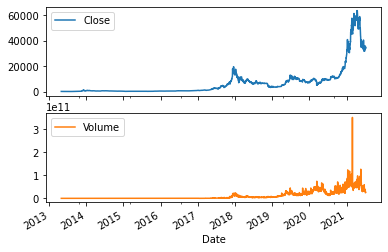

In [9]:
btc.plot(subplots=True)

In [10]:
btc[btc['Volume']==0]

,Close,Volume
Date,,
2013-04-29 23:59:59,144.539993,0.0
2013-04-30 23:59:59,139.000000,0.0
2013-05-01 23:59:59,116.989998,0.0
2013-05-02 23:59:59,105.209999,0.0
2013-05-03 23:59:59,97.750000,0.0
...,...,...
2013-12-22 23:59:59,617.179993,0.0
2013-12-23 23:59:59,673.409973,0.0
2013-12-24 23:59:59,665.580017,0.0
